## Load MNIST Data
MNIST is a dataset of images of the numbers 0 to 9. The problem is to classify the images as numbers. Setup libraries and load the MNIST dataset. Display the first few rows to verify that the data loaded. You'll explore the data format after the data loads.

In [1]:
# Load libraries
from os.path import join
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
import unittest

In [2]:
# set pandas display options
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.2f}'.format

In [3]:
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [4]:
# Load data
mnistDf_backup = pd.read_csv(
    "https://download.mlcc.google.com/mledu-datasets/mnist_train_small.csv",
    sep=",", header=None)

In [5]:
# Shuffle data
mnistDf_backup.sample(frac=1).reset_index(drop=True) # 기존 idx를 drop시키고 0부터 순서

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19998,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Use the first 5000 examples for faster prototyping
mnistDf = mnistDf_backup[0:5000]

mnistDf.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
showExample = 2
# digitData = np.reshape(np.array(mnistDf.iloc[showExample, 1:]), [28,28])
digitData = np.array(mnistDf.iloc[showExample, 1:]).reshape(28,28)
print(digitData)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  32
   97 179 254 223  72   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  13  65 185 235
  253 254 253 253 199   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  37  55   0  61 224 25

## Do you have Imbalanced Classes?
As we read in the course, imbalanced classes make classification harder. Let's look at the distribution of classes. Do you have imbalanced classes?

In [8]:
# Calculate the number of classes
numClasses = mnistDf.iloc[:, 0].unique().shape[0]

([<matplotlib.axis.XTick at 0x24fa1a46d90>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

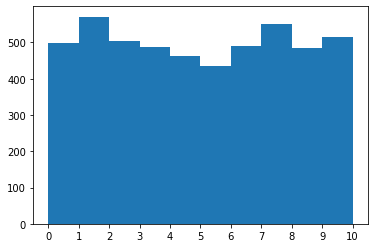

In [9]:
# Plot histogram of class distribution
# (mnistDf.iloc[:, 0]).value_counts().sort_index()
plt.hist(mnistDf.iloc[:, 0], bins=range(numClasses+1))
plt.xticks(range(numClasses+1))

The preceding graph shows that the 10 classes are roughly equally represented.

## Shuffle and Split Dataset
As part of [Data Debugging](https://developers.google.com/machine-learning/testing-debugging/common/data-errors) best practices, ensure your splits are statistically equivalent by shuffling your data to remove any pre-existing order.

In [10]:
mnistDf = mnistDf.sample(frac=1).reset_index(drop=True)

In [11]:
mnistData = mnistDf.iloc[:, 1:].copy(deep=True)
mnistLabels = mnistDf.iloc[:, 0].copy(deep=True)

## Process Data
Scale the data values to `[0,1]` since the values are bounded to `[0,255]` and do not contain outliers. Then check that the scaled data values are as expected by generating summary statistics using the `DataFrame.describe()` function.

Run the following cell to scale data and generate statistics. This cell takes a few minutes to run.

In [12]:
def minMaxScaler(arr):
    max = np.max(arr)
    if(max!=0):  # avoid /0
        min = np.min(arr)
        arr = (arr-min)/max
    return arr

In [13]:
for featureIdx in range(mnistData.shape[1]):
    mnistData.iloc[:,featureIdx] = minMaxScaler(mnistData.iloc[:,featureIdx])

In [14]:
mnistData.describe()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,...,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
std,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.03,0.02,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.00
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00


## Establish Baseline
Following development best practices, you should establish a baseline. The simplest baseline is predicting the most common class. You saw that the most common class is 1. Let's check the accuracy when always predicting 1.

In [15]:
np.sum(mnistLabels==1)*1.0/mnistLabels.shape[0]*100

11.42

## Train a Linear Model
Let's start nice and easy with a linear model. All we need is an accuracy > 11%.

First, let's define a function to plot our loss and accuracy curves. The function will also print the final loss and accuracy. Instead of using `verbose=1`, you can call the function.

In [16]:
def showClassificationResults(trainHistory):
    print('Final training loss: ' + str(trainHistory.history['loss'][-1]))
    print('Final validation loss: ' + str(trainHistory.history['val_loss'][-1]))
    print('Final training accuracy: ' + str(trainHistory.history['accuracy'][-1]))
    print('Final validation accuracy: ' + str(trainHistory.history['val_accuracy'][-1]))
    
    # Plot loss and accuracy curves
    f = plt.figure(figsize=(10,4))
    axLoss = f.add_subplot(121)
    axAcc = f.add_subplot(122)
    axLoss.plot(trainHistory.history['loss'])
    axLoss.plot(trainHistory.history['val_loss'])
    axLoss.legend(['Training loss', 'Validation loss'], loc='best')
    axLoss.set_xlabel('Training epochs')
    axLoss.set_ylabel('Loss')
    axAcc.plot(trainHistory.history['accuracy'])
    axAcc.plot(trainHistory.history['val_accuracy'])
    axAcc.legend(['Training accuracy', 'Validation accuracy'], loc='best')
    axAcc.set_xlabel('Training epochs')
    axAcc.set_ylabel('Accuracy')

Now train a linear model with an output layer and a hidden layer.

Epoch 1/10
40/40 [==============================] - 0s 6ms/step - loss: 7.0537 - accuracy: 0.1390 - val_loss: 4.0598 - val_accuracy: 0.1590
Epoch 2/10
40/40 [==============================] - 0s 4ms/step - loss: 4.0221 - accuracy: 0.1435 - val_loss: 3.9654 - val_accuracy: 0.1970
Epoch 3/10
40/40 [==============================] - 0s 4ms/step - loss: 3.8174 - accuracy: 0.1443 - val_loss: 3.7235 - val_accuracy: 0.1770
Epoch 4/10
40/40 [==============================] - 0s 4ms/step - loss: 3.7539 - accuracy: 0.1398 - val_loss: 3.7479 - val_accuracy: 0.1600
Epoch 5/10
40/40 [==============================] - 0s 4ms/step - loss: 3.6427 - accuracy: 0.1390 - val_loss: 3.6465 - val_accuracy: 0.1490
Epoch 6/10
40/40 [==============================] - 0s 4ms/step - loss: 3.6876 - accuracy: 0.1440 - val_loss: 3.6544 - val_accuracy: 0.1550
Epoch 7/10
40/40 [==============================] - 0s 4ms/step - loss: 3.4965 - accuracy: 0.1412 - val_loss: 3.8149 - val_accuracy: 0.1520
Epoch 8/10
40/40 [==

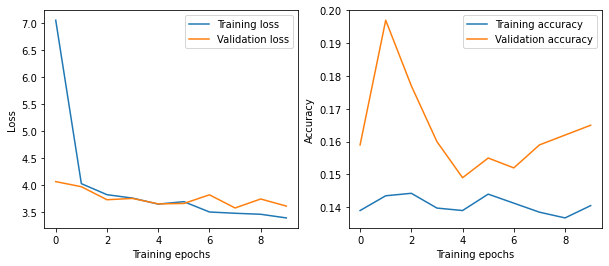

In [17]:
mnistDataSelected = mnistData.iloc[:,0]
mnistLabelSelected = mnistLabels[:]
in_dim = mnistData.shape[1]

model = None

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=in_dim, activation='linear', input_dim=in_dim))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(), 
              metrics=['accuracy'])

trainHistory = model.fit(mnistData, mnistLabels, epochs=10, batch_size=100, validation_split=0.2, verbose=1)

# Plot the results
showClassificationResults(trainHistory)

Wow, that accuracy is terrible! What could the cause be?

Hint: You followed the same procedure as for the previous regression problem. Do you need an adaptation for a classification problem? Experiment with the code above or skip to the solution below.

In regression, the last layer uses a linear activation function. In classification, the last layer <span style='color:red'> cannot use a linear transform</span>. Instead, one option is a <span style='color:red'>softmax transform</span>. Furthermore, in regression, the loss is calculated using MSE while in classification, loss is calculated using <span style='color:red'> crossentropy</span>. Before running your model, if you wrote a test to validate the output values, your test would detect the anomalous output. You'll look at such a test later. Move onto the next section to fix the loss calculation.

## Fixing Loss Calculation
Since your labels are integers instead of one-hot encodings, use <span style='color:red'> sparse_categorical_crossentropy</span> instead of <span style='color:red'> categorical_crossentropy</span> so that you avoid converting the integers to one-hot encoding.

Epoch 1/10
45/45 [==============================] - 0s 6ms/step - loss: 0.6746 - accuracy: 0.7938 - val_loss: 0.3850 - val_accuracy: 0.8780
Epoch 2/10
45/45 [==============================] - 0s 4ms/step - loss: 0.3411 - accuracy: 0.8987 - val_loss: 0.3597 - val_accuracy: 0.9000
Epoch 3/10
45/45 [==============================] - 0s 4ms/step - loss: 0.3001 - accuracy: 0.9113 - val_loss: 0.3671 - val_accuracy: 0.9080
Epoch 4/10
45/45 [==============================] - 0s 4ms/step - loss: 0.2657 - accuracy: 0.9233 - val_loss: 0.3788 - val_accuracy: 0.9080
Epoch 5/10
45/45 [==============================] - 0s 4ms/step - loss: 0.2433 - accuracy: 0.9287 - val_loss: 0.3758 - val_accuracy: 0.9040
Epoch 6/10
45/45 [==============================] - 0s 4ms/step - loss: 0.2177 - accuracy: 0.9404 - val_loss: 0.4010 - val_accuracy: 0.9020
Epoch 7/10
45/45 [==============================] - 0s 4ms/step - loss: 0.2024 - accuracy: 0.9447 - val_loss: 0.3971 - val_accuracy: 0.8940
Epoch 8/10
45/45 [==

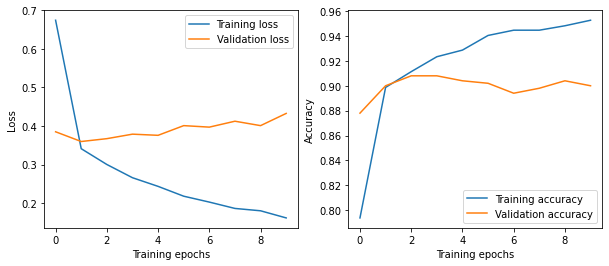

In [18]:
mnistDataSelected = mnistData.iloc[:,0]
mnistLabelSelected = mnistLabels[:]
in_dim = mnistData.shape[1]

model = None

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=in_dim, activation='linear', input_dim=in_dim))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), 
              metrics=['accuracy'])

# trainHistory = model.fit(mnistData, mnistLabels, epochs=10, 
#                          batch_size=100, validation_split=0.1, verbose=1)
trainHistory = model.fit(mnistData, mnistLabels, epochs=10, batch_size=100, validation_split=0.1, verbose=1)

# Plot the results
showClassificationResults(trainHistory)

Your loss curves are much better. Your accuracy has improved too. You're on the right track.

## Train a Nonlinear Model
Switch to a nonlinear model by modifying the code below to use relu activation functions instead of linear activation functions. Run the code. What do you observe?